## UPLOADING RAW DATA
Uploading exoTest.csv file for data testing

In [4]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('exoTest.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the data:")
print(df.head())

# Get a summary of the DataFrame (number of rows, columns, data types)
print("\nDataFrame information:")
df.info()

# Get a statistical summary of the numerical columns
print("\nStatistical summary of the data:")
print(df.describe())

# Check the number of each label in the 'LABEL' column
print("\nNumber of confirmed exoplanets vs. non-exoplanets:")
print(df['LABEL'].value_counts())

First 5 rows of the data:
   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0      2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1      2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2      2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3      2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4      2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   

    FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0     6.98     6.63  ...      14.52      19.29      14.44      -1.62   
1  5569.47  5550.44  ...    -581.91    -984.09   -1230.89   -1600.45   
2   362.95   207.27  ...      17.82     -51.66     -48.29     -59.99   
3  -746.50  -709.53  ...     122.34      93.03      93.03      68.81   
4   -45.20    -5.04  ...     -37.87     -61.85     -27.15     -21.18   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      13.33      45

## HANDLING MISSING VALUES & FEATURE ENGINEERING

Separating data and labels

In [5]:
# Create a DataFrame for features (all columns except 'LABEL')
features = df.drop('LABEL', axis=1)

# Create a Series for labels (the 'LABEL' column)
labels = df['LABEL']

print("Shape of features DataFrame:", features.shape)
print("Shape of labels Series:", labels.shape)

Shape of features DataFrame: (43, 3197)
Shape of labels Series: (43,)


Creating first features

In [6]:
import numpy as np

# Create new features from the light curve data

# 1. Mean Flux: The average brightness of the star over time.
# The mean is a simple but powerful feature.
features['mean_flux'] = features.mean(axis=1)

# 2. Standard Deviation of Flux: How much the brightness varies.
# This helps the model spot a periodic dip.
features['std_flux'] = features.std(axis=1)

# 3. Maximum Flux: The brightest the star got.
features['max_flux'] = features.max(axis=1)

# 4. Minimum Flux: The dimmest the star got.
features['min_flux'] = features.min(axis=1)

# Display the new features along with the first few original flux columns
print("\nDataFrame with new features:")
print(features.head())


DataFrame with new features:
    FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7   FLUX.8  \
0   119.88   100.21    86.46    48.68    46.12    39.39    18.57     6.98   
1  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39  5569.47   
2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   362.95   
3  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22  -746.50   
4   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   -45.20   

    FLUX.9  FLUX.10  ...  FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  \
0     6.63   -21.97  ...      13.33      45.50      31.93      35.78   
1  5550.44  5458.80  ...   -1824.53   -2061.17   -2265.98   -2366.19   
2   207.27   150.46  ...     -82.10    -174.54     -95.23    -162.68   
3  -709.53  -679.56  ...       9.81      20.75      20.25    -120.81   
4    -5.04    14.62  ...     -33.76     -85.34     -81.46     -61.98   

   FLUX.3196  FLUX.3197  mean_flux     std_flux  max_flux  min_flux  
0   

Starting Feature Engineering

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing Raw Light Curves

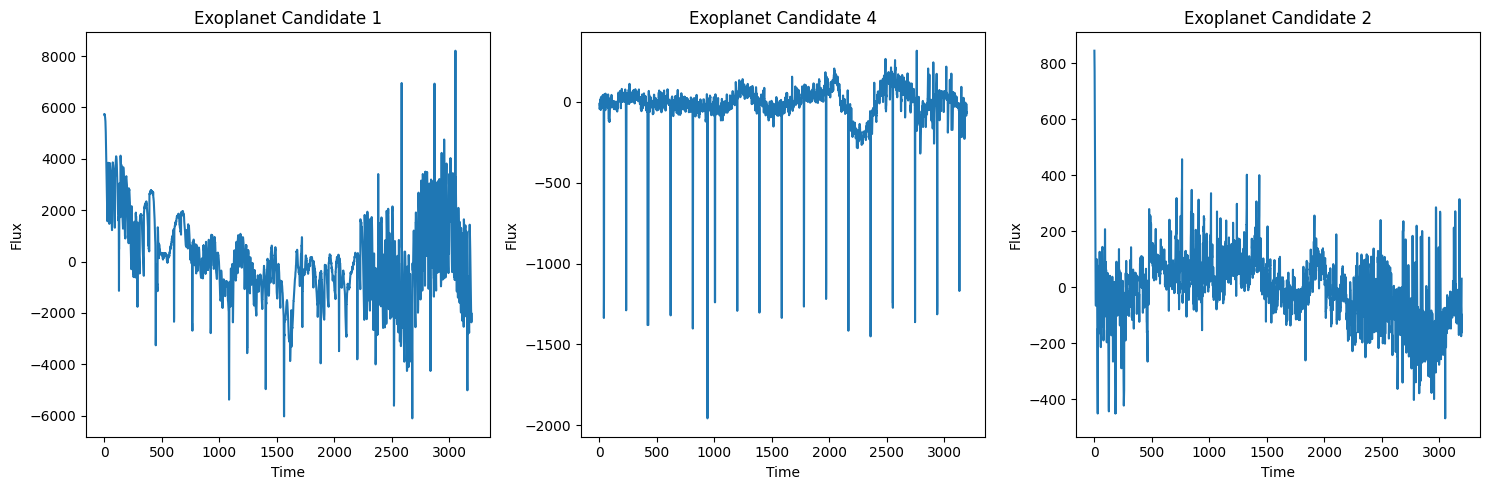

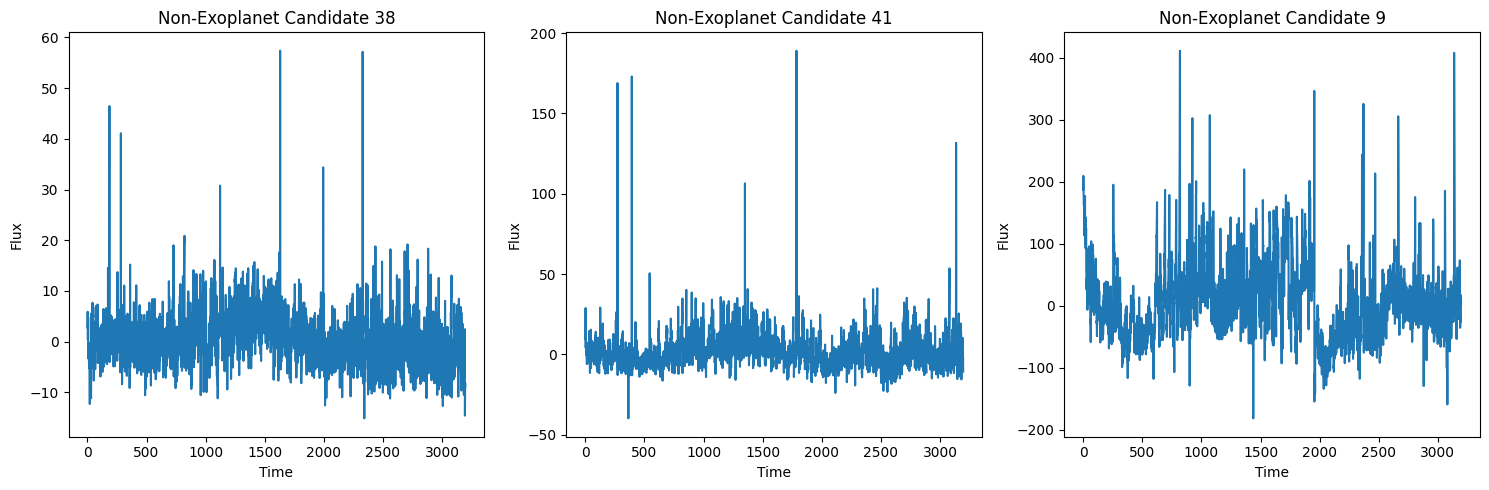

In [8]:
# Select a few random samples for visualization
sample_exoplanets = df[df['LABEL'] == 2].sample(3, random_state=42)
sample_non_exoplanets = df[df['LABEL'] == 1].sample(3, random_state=42)

# Plot a few light curves for confirmed exoplanets
plt.figure(figsize=(15, 5))
for i, (index, row) in enumerate(sample_exoplanets.iterrows()):
    plt.subplot(1, 3, i + 1)
    plt.plot(row.drop('LABEL').values)
    plt.title(f"Exoplanet Candidate {index}")
    plt.xlabel("Time")
    plt.ylabel("Flux")
plt.tight_layout()
plt.show()

# Plot a few light curves for non-exoplanets
plt.figure(figsize=(15, 5))
for i, (index, row) in enumerate(sample_non_exoplanets.iterrows()):
    plt.subplot(1, 3, i + 1)
    plt.plot(row.drop('LABEL').values)
    plt.title(f"Non-Exoplanet Candidate {index}")
    plt.xlabel("Time")
    plt.ylabel("Flux")
plt.tight_layout()
plt.show()

Visualizing New Features

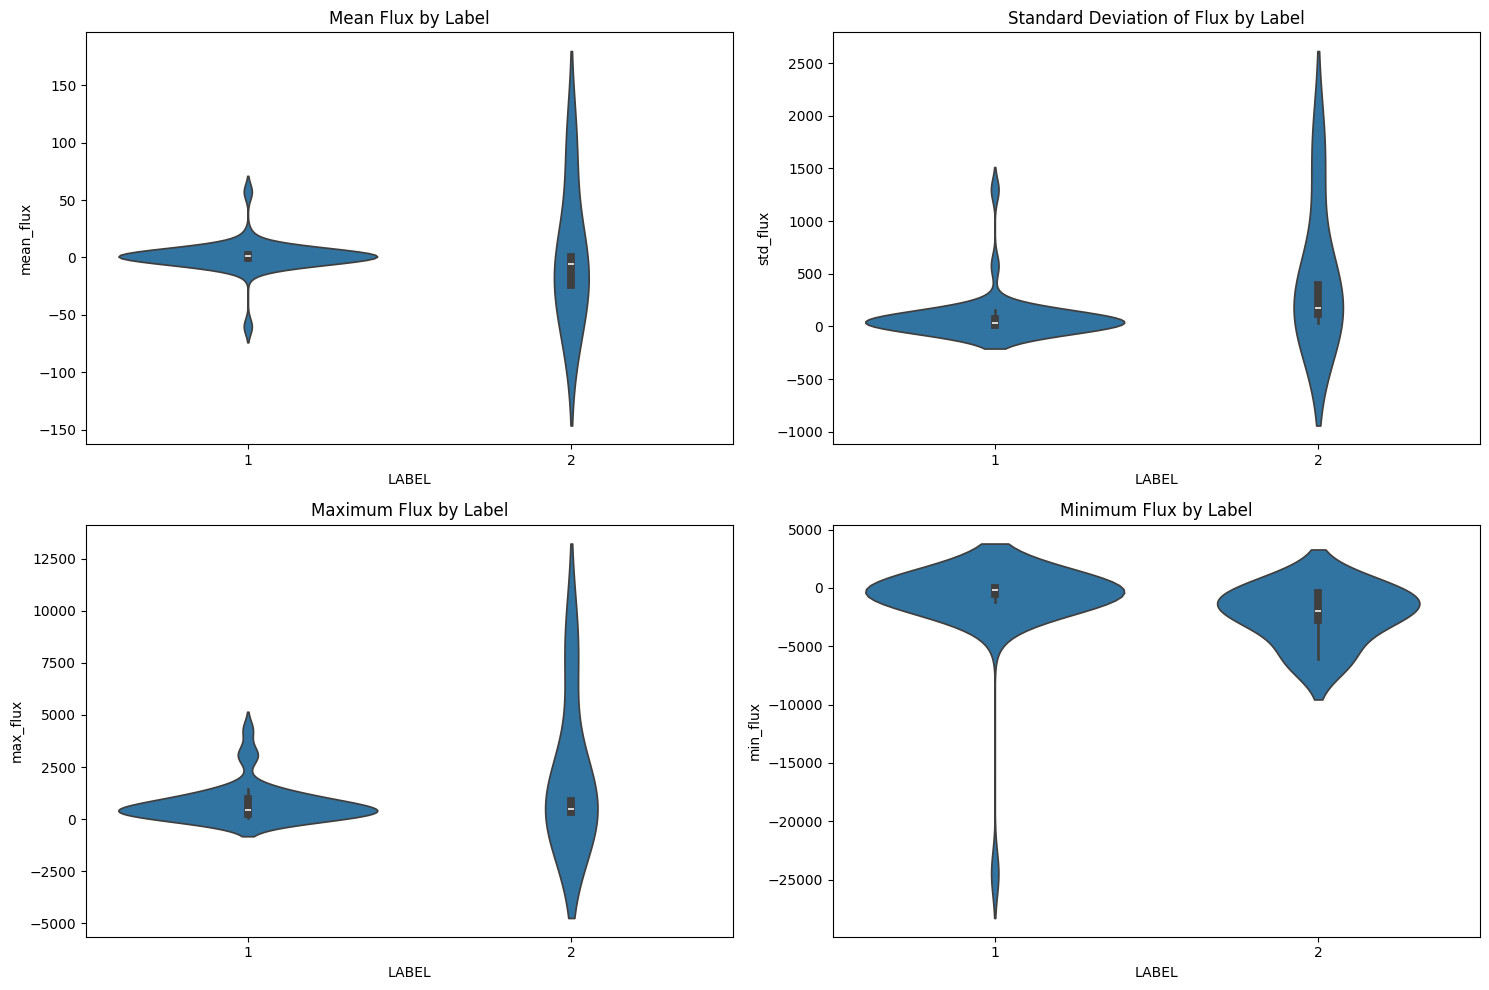

In [9]:
# Create a temporary DataFrame to hold the new features and labels
features_with_labels = features.copy()
features_with_labels['LABEL'] = labels

# Plot violin plots to compare feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x='LABEL', y='mean_flux', data=features_with_labels, ax=axes[0, 0])
axes[0, 0].set_title('Mean Flux by Label')
sns.violinplot(x='LABEL', y='std_flux', data=features_with_labels, ax=axes[0, 1])
axes[0, 1].set_title('Standard Deviation of Flux by Label')
sns.violinplot(x='LABEL', y='max_flux', data=features_with_labels, ax=axes[1, 0])
axes[1, 0].set_title('Maximum Flux by Label')
sns.violinplot(x='LABEL', y='min_flux', data=features_with_labels, ax=axes[1, 1])
axes[1, 1].set_title('Minimum Flux by Label')

plt.tight_layout()
plt.show()